# Scale follow with training data

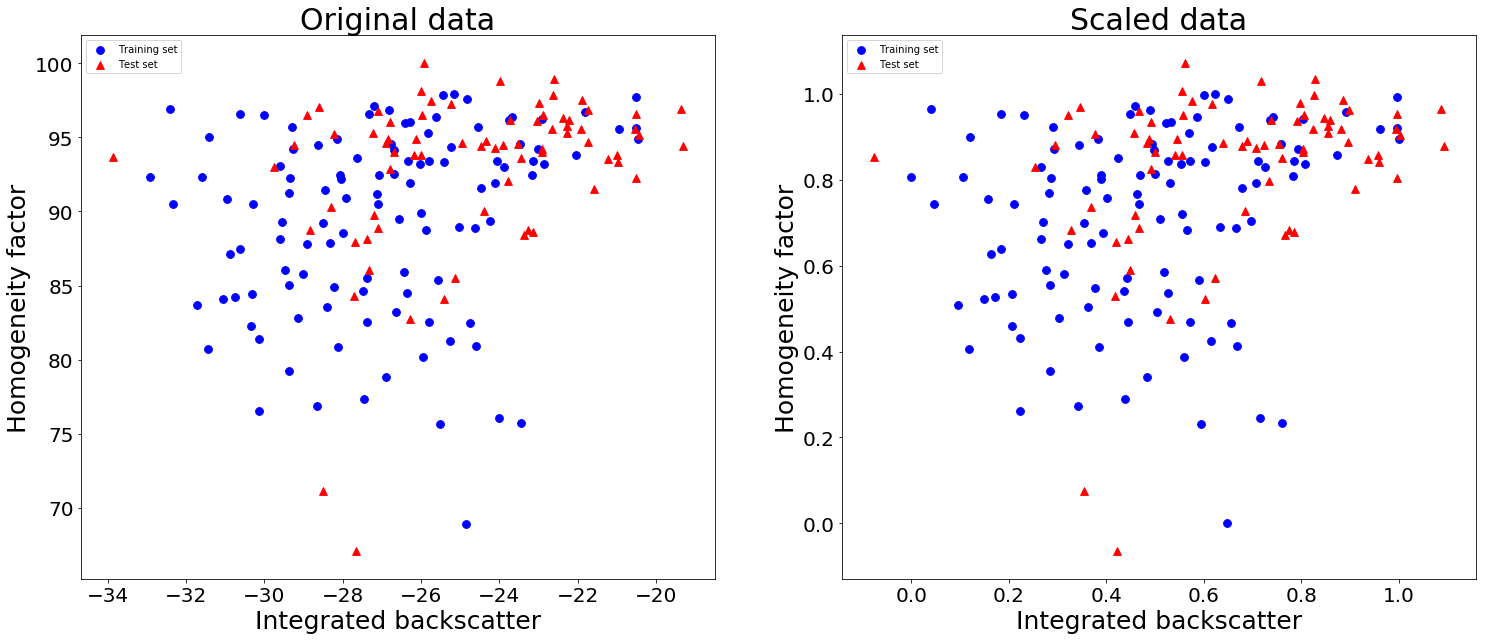

In [23]:
# import models
import matplotlib.pyplot as plt 
import numpy as np
import xlrd
from sklearn.preprocessing import MinMaxScaler

# load data
## Pathology  for train
data = xlrd.open_workbook("Pathology.xlsx").sheets()[0]
X_tra = np.zeros((111, 2))
X_tra[:, 0] = data.col_values(3)  # X0 = Integrated backscatter
#X_tra[:, 1] = data.col_values(4)  # X1 = Q factor (HHT)
X_tra[:, 1] = data.col_values(6)  # X2 = Homogeneity factor

### scaling to 0~1
Scaler = MinMaxScaler(copy=True, feature_range=(0, 1)).fit(X_tra)
X_train = Scaler.transform(X_tra)

nrows = data.nrows
y_train = []
for i in range(nrows):  # y = 'T' or 'F' from Pathology  data 
    if data.cell(i,1).value < 10:
        y_train.append(0)
    elif data.cell(i,1).value >= 10:
        y_train.append(1)
y_train = np.ravel(y_train)   # Return a contiguous flattened array
class_names = np.ravel(['negative', 'positive'])  

## New Pathology for test
data = xlrd.open_workbook("NPathology.xlsx").sheets()[0]
X_te = np.zeros((74, 2))
X_te[:, 0] = data.col_values(3)  # X0 = Integrated backscatter
#X_te[:, 1] = data.col_values(4)  # X1 = Q factor (HHT)
X_te[:, 1] = data.col_values(6)  # X3 = Homogeneity factor

### scaling to 0~1
X_test = Scaler.transform(X_te)

nrows = data.nrows
y_test = []
for i in range(nrows):  # y = 'T' or 'F' from Pathology  data 
    if data.cell(i,1).value < 10:
        y_test.append(0)
    elif data.cell(i,1).value >= 10:
        y_test.append(1)
y_test = np.ravel(y_test)   # Return a contiguous flattened array

# plot
plt.figure(figsize = (25, 10))

plt.subplot(1, 2, 1)
plt.scatter(X_tra[:, 0], X_tra[:, 1], s = 60, c = 'blue', alpha = 1, label='Training set')
plt.scatter(X_te[:, 0], X_te[:, 1], s = 60, c = 'red', alpha = 1, label='Test set', marker = '^')
plt.title('Original data', size=30)
plt.xlabel('Integrated backscatter', size = 25)
plt.ylabel('Homogeneity factor', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc='upper left')
    
plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], s = 60, c = 'blue', alpha = 1, label='Training set')
plt.scatter(X_test[:, 0], X_test[:, 1], s = 60, c = 'red', alpha = 1, label='Test set', marker = '^')
plt.title('Scaled data', size=30)
plt.xlabel('Integrated backscatter', size = 25)
plt.ylabel('Homogeneity factor', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc='upper left')
plt.savefig('Data Visualization\Scaling follow training data.png')
plt.show()

# Scale separately

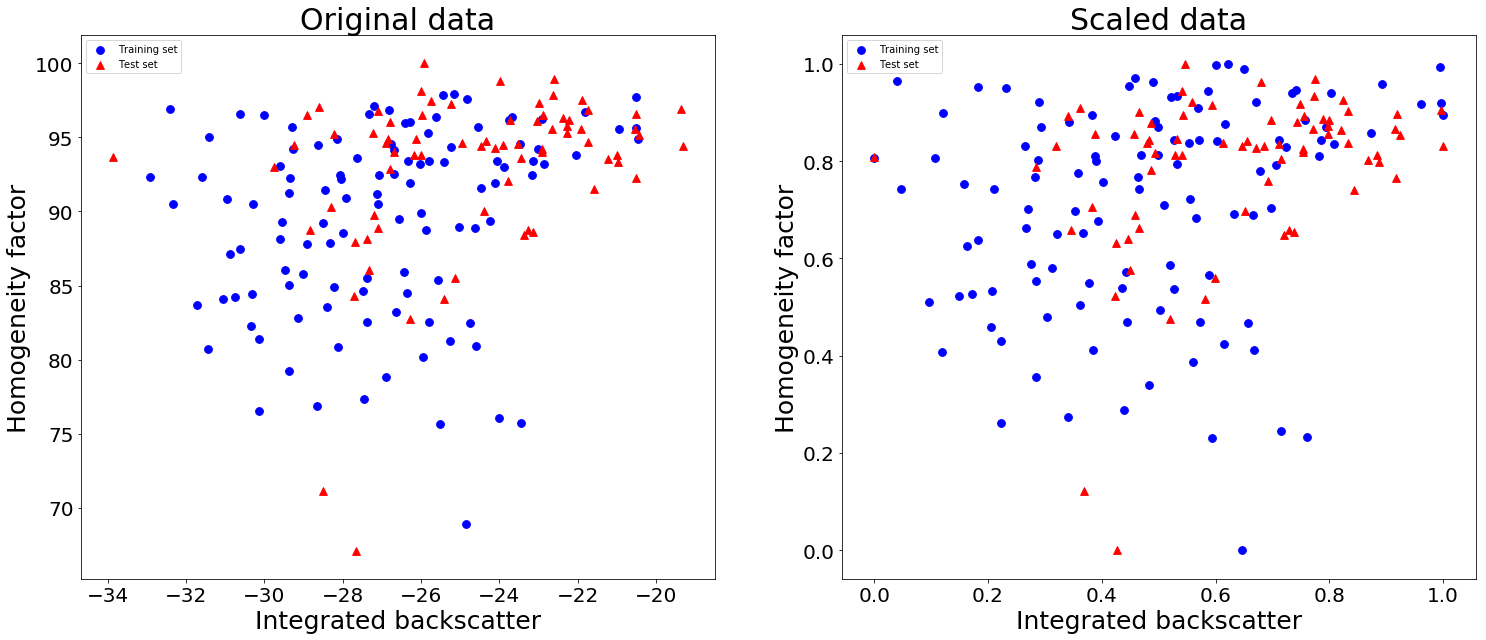

In [1]:
# import models
import matplotlib.pyplot as plt 
import numpy as np
import xlrd
from sklearn.preprocessing import MinMaxScaler

# load data
## Pathology  for train
data = xlrd.open_workbook("Pathology.xlsx").sheets()[0]
X_tra = np.zeros((111, 2))
X_tra[:, 0] = data.col_values(3)  # X0 = Integrated backscatter
#X_tra[:, 1] = data.col_values(4)  # X1 = Q factor (HHT)
X_tra[:, 1] = data.col_values(6)  # X2 = Homogeneity factor

### scaling to 0~1
X_train = MinMaxScaler(copy=True, feature_range=(0, 1)).fit(X_tra).transform(X_tra)

nrows = data.nrows
y_train = []
for i in range(nrows):  # y = 'T' or 'F' from Pathology  data 
    if data.cell(i,1).value < 10:
        y_train.append(0)
    elif data.cell(i,1).value >= 10:
        y_train.append(1)
y_train = np.ravel(y_train)   # Return a contiguous flattened array
class_names = np.ravel(['negative', 'positive'])  

## New Pathology for test
data = xlrd.open_workbook("NPathology.xlsx").sheets()[0]
X_te = np.zeros((74, 2))
X_te[:, 0] = data.col_values(3)  # X0 = Integrated backscatter
#X_te[:, 1] = data.col_values(4)  # X1 = Q factor (HHT)
X_te[:, 1] = data.col_values(6)  # X3 = Homogeneity factor

### scaling to 0~1
X_test = MinMaxScaler(copy=True, feature_range=(0, 1)).fit(X_te).transform(X_te)

nrows = data.nrows
y_test = []
for i in range(nrows):  # y = 'T' or 'F' from Pathology  data 
    if data.cell(i,1).value < 10:
        y_test.append(0)
    elif data.cell(i,1).value >= 10:
        y_test.append(1)
y_test = np.ravel(y_test)   # Return a contiguous flattened array

# plot
plt.figure(figsize = (25, 10))

plt.subplot(1, 2, 1)
plt.scatter(X_tra[:, 0], X_tra[:, 1], s = 60, c = 'blue', alpha = 1, label='Training set')
plt.scatter(X_te[:, 0], X_te[:, 1], s = 60, c = 'red', alpha = 1, label='Test set', marker = '^')
plt.title('Original data', size=30)
plt.xlabel('Integrated backscatter', size = 25)
plt.ylabel('Homogeneity factor', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc='upper left')
    
plt.subplot(1, 2, 2)
plt.scatter(X_train[:, 0], X_train[:, 1], s = 60, c = 'blue', alpha = 1, label='Training set')
plt.scatter(X_test[:, 0], X_test[:, 1], s = 60, c = 'red', alpha = 1, label='Test set', marker = '^')
plt.title('Scaled data', size=30)
plt.xlabel('Integrated backscatter', size = 25)
plt.ylabel('Homogeneity factor', size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.legend(loc='upper left')
plt.savefig('Data Visualization\Scaling separately.png')
plt.show()